In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) # by this it will ensure that we always get the same random value when the code is excuted again and again
from tensorflow import keras # deep learning library
from keras.datasets import mnist #contains grayscale images as dataset
from tensorflow.math import confusion_matrix

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # returns train and test data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) # (60000, 28, 28) => (no of imgs, width, height)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [6]:
# printing the 10th image in x_train
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)

(28, 28)


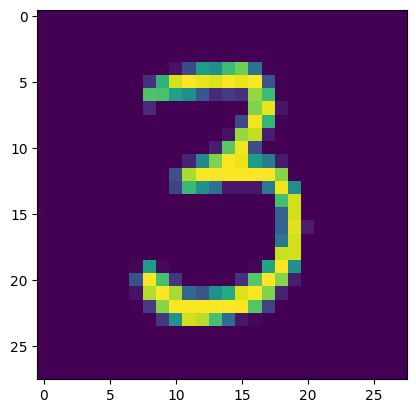

3


In [8]:
# displaying the image

plt.imshow(x_train[50])
plt.show()

# print the corresponding label
print(y_train[50])

In [9]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(y_train))

# unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [11]:
# scaling the values (performing Normalization) as each image is represented in X_train are in the range from 0 to 255 (where 255, 254 etc high values can affect model performance).

x_train = x_train/255 # value range from 0 to 1
x_test = x_test/255 # value range from 0 to 1

In [12]:
# printing the 10th image in x_train
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [13]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #the first layer (input layer) of NN takes data as a single array # (28,28) is the (width , height) of img. # incase you are working with RGB img then (28,28,3) where 3 is channels of R,G and B
                          keras.layers.Dense(50, activation='relu'), # Dense means this layer will be connected to its prev and next layer # 50 is the no of neurons in this layer # relu is the activation function here
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') # output layer # 10 means the number of classes we have in target attribute eg. for this dataset we have possible outputs in target attribute [0,1,2,3,4,5,6,7,8,9] total=10 that's why
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compiling the Neural Network

model.compile(optimizer='adam', # optimizer we used
              loss = 'sparse_categorical_crossentropy', # loss function # we used 'sparse_categorical_crossentropy' as we are using integer values in target attribute if we perfomed one hot encoding in target attribute then we should use loss function 'categorical_crossentropy'
              metrics=['accuracy'])

In [15]:
# training the Neural Network

model.fit(x_train, y_train, epochs=10) #epochs defines how many times our NN should go through the data to adjust parameters in terms to increase the accuracy

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8497 - loss: 0.5188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9558 - loss: 0.1464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9688 - loss: 0.1047
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0809
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9805 - loss: 0.0658
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9837 - loss: 0.0541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9904 - loss: 0.0315


we can see that the accuracy is increased and loss is decreased . That means our model is perfect.

Training data accuracy = 99.1%

**Accuracy on Test data:**

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1449
0.9660000205039978


Test data accuracy = 97.1%

In [17]:
print(x_test.shape)

(10000, 28, 28)


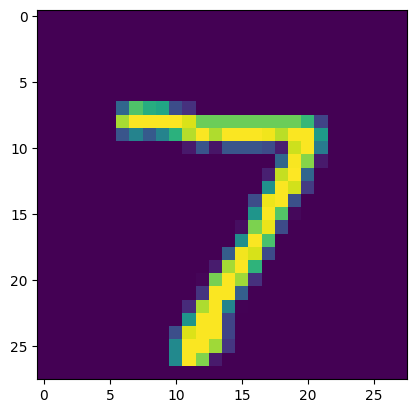

In [18]:
# first data point in X_test
plt.imshow(x_test[0])
plt.show()

In [19]:
print(y_test[0])


7


In [20]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0]) #it contains 10 values that's why (10000, 10)

[8.7057622e-03 8.7131803e-06 3.5986055e-03 9.8454130e-01 7.9049641e-08
 7.3393495e-03 5.2158899e-09 9.9999464e-01 4.3120584e-03 8.4801596e-01]


[2.4175295e-04 3.3705655e-04 5.8861699e-02 5.4344416e-01 4.6168980e-06

 1.4045294e-05 7.6403836e-14 9.9999785e-01 8.0823582e-03 2.1472523e-01]

 here this numbers shows the probability of the result being 0 to 9.

 probability of being 0 is 2.4175295e-04

 probability of being 1 is 3.3705655e-04

 probability of being 2 is 5.8861699e-02

 and so on...

model.predict() gives the prediction probability of each class for that data point

In [23]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True labels

Y_pred_labels --> Predicted Labels

**Evaluation of the model using Confusin Matrix**

In [25]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [26]:
print(conf_mat) # let's understand this matrix using heatmap

tf.Tensor(
[[ 946    0    3    2    1    3    8    0    2   15]
 [   0 1121    3    2    0    0    4    1    4    0]
 [   4    3  998   15    1    1    1    5    4    0]
 [   0    0    7  992    0    0    1    4    2    4]
 [   0    0    7    0  957    0    6    2    1    9]
 [   2    0    0   22    2  854    4    0    3    5]
 [   2    2    3    0    3    8  939    0    1    0]
 [   0    3   10    1    1    1    0  977    1   34]
 [   3    1    7   27    5    9    5    2  907    8]
 [   1    3    2    8   18    4    1    0    3  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

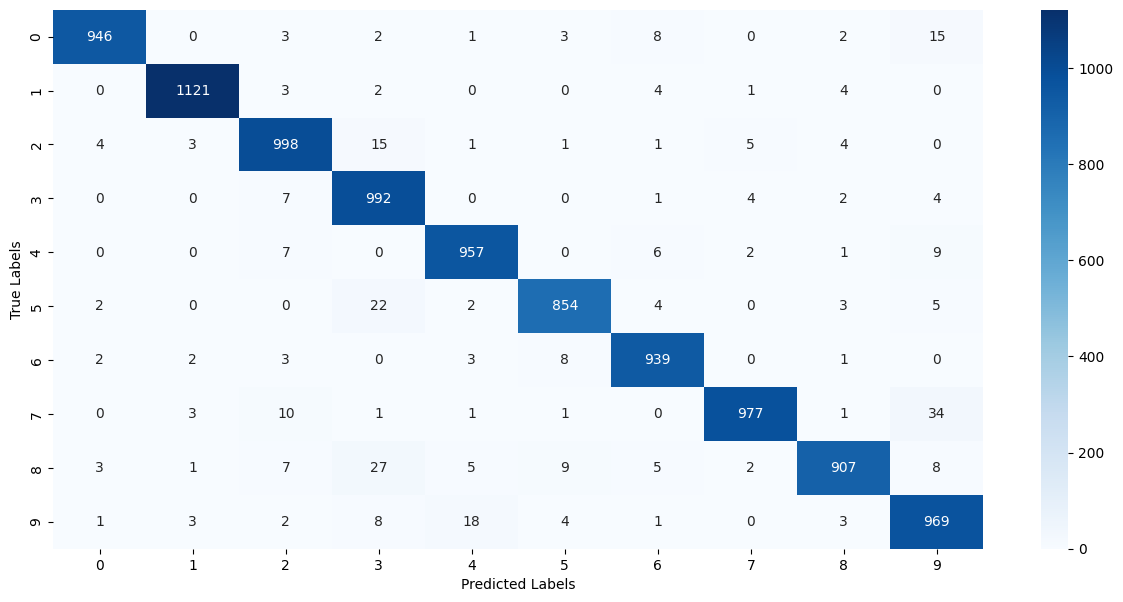

In [27]:
plt.figure(figsize=(15,7)) #it provides the canvas in which heatmap will be created # (15,7) => (width,height)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') #fmt stands for format and 'd' means decimal as our confusion matrix has numeric values if it contains float values then fmt='.2f'
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [32]:
input_image_path = '/content/Digit3.png'
input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [255 255 255]]]


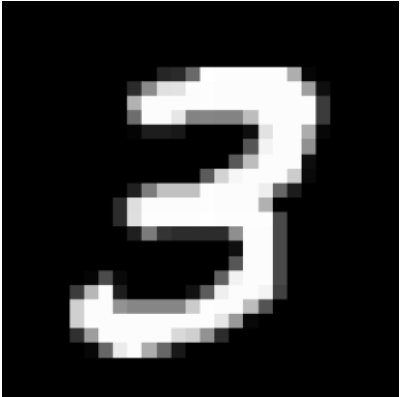

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape #it is an RGB image

(397, 400, 3)

In [37]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(397, 400)

In [39]:
input_image_resize = cv2.resize(grayscale, (28, 28)) # resize the image to the appropriate size

In [40]:
input_image_resize.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resize)

In [44]:
input_image_resize = input_image_resize/255

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) # telling the model that we are using only one data (img) to make prediction # if we want to use 10 data then replace 1 by 10 in [1,28,28] where 28 is width and height of img # if the img is RGB img then [1,28,28,3] 3 is for RGB

In [46]:
print(image_reshaped)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [47]:
input_prediction = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [49]:
print(input_prediction)

[[1.20848895e-08 3.74862622e-03 3.65057873e-04 1.00000000e+00
  8.85697489e-08 6.91447465e-04 1.34720776e-16 2.49691028e-02
  1.92030875e-05 5.16094789e-02]]


In [50]:
input_pred_label = np.argmax(input_prediction)

In [51]:
print('The Handwritten Digit is recognised as ', input_pred_label)

The Handwritten Digit is recognised as  3
